In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
raw_df = pd.read_csv("AB_NYC_2019.csv")
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [4]:
raw_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
new_df = raw_df.drop(["id","name","host_name","host_id","calculated_host_listings_count","last_review","reviews_per_month","latitude","longitude"], axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
neighbourhood_group    48895 non-null object
neighbourhood          48895 non-null object
room_type              48895 non-null object
price                  48895 non-null int64
minimum_nights         48895 non-null int64
number_of_reviews      48895 non-null int64
availability_365       48895 non-null int64
dtypes: int64(4), object(3)
memory usage: 2.6+ MB


In [6]:
new_df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,355
2,Manhattan,Harlem,Private room,150,3,0,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0


new_df is created from raw_df after eliminating unnecessary coloumns.

Giving weights to feature 'room_type'

In [8]:
new_df['room_type'] = new_df['room_type'].map({'Shared room':1,'Private room':2,'Entire home/apt':3})


In [9]:
n_gp = list(new_df.neighbourhood_group.unique())
neighbrs_gp = new_df["neighbourhood_group"].str.get_dummies("EOL")
neighbrs = new_df["neighbourhood"].str.get_dummies("EOL")
new_df1 = pd.concat([new_df,neighbrs_gp,neighbrs],axis=1)
new_df1 = new_df1.drop(["neighbourhood_group", "neighbourhood"],axis=1)
new_df1["rate"] = new_df1["price"]/new_df1["minimum_nights"]
new_df["rate"] = new_df["price"]/new_df["minimum_nights"]

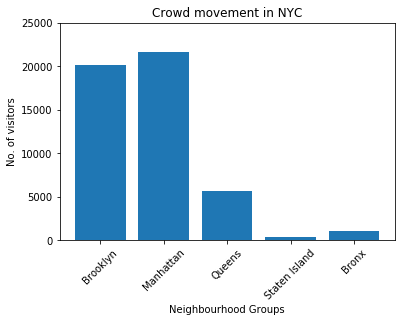

In [10]:
'''Data visualisation'''
#Which are the busiest areas?

crowd=[]
for i in (n_gp):
    crowd.append(new_df1[i].sum())
i=0
plt.ylim(0,25000)  
plt.bar(n_gp, crowd)
plt.xticks(rotation=45)
plt.title('Crowd movement in NYC')
plt.xlabel('Neighbourhood Groups') 
plt.ylabel('No. of visitors')
plt.show()